In [ ]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 kB 32.5 MB/s eta 0:00:00



0: 480x640 16 persons, 1 cup, 13 chairs, 1 dining table, 2 laptops, 1 clock, 235.0ms
Speed: 4.1ms preprocess, 235.0ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


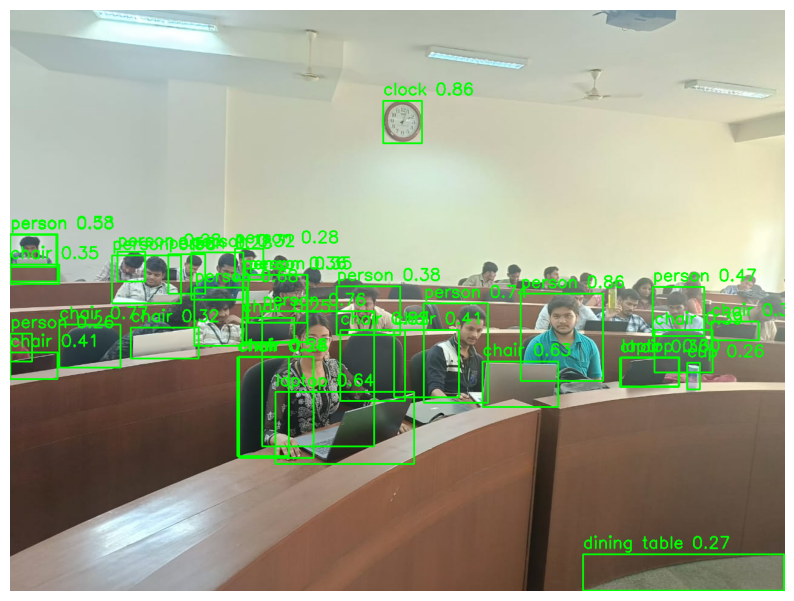

In [ ]:
import torch
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

image_path = '/content/WhatsApp Image 2024-09-05 at 14.00.34.jpeg'
image = cv2.imread(image_path)

results = model(image)
result = results[0]

detections = result.boxes

class_names = model.names

for detection in detections:
    x1, y1, x2, y2 = detection.xyxy[0]
    confidence = detection.conf
    class_id = detection.cls

    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

    class_name = class_names[int(class_id)]

    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    label = f"{class_name} {confidence.item():.2f}"
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [ ]:
predicted_confidences = [detection.conf.item() for detection in detections]

In [ ]:
import numpy as np
actual_confidences = [np.clip(conf + np.random.normal(0, 0.1), 0, 1) for conf in predicted_confidences]

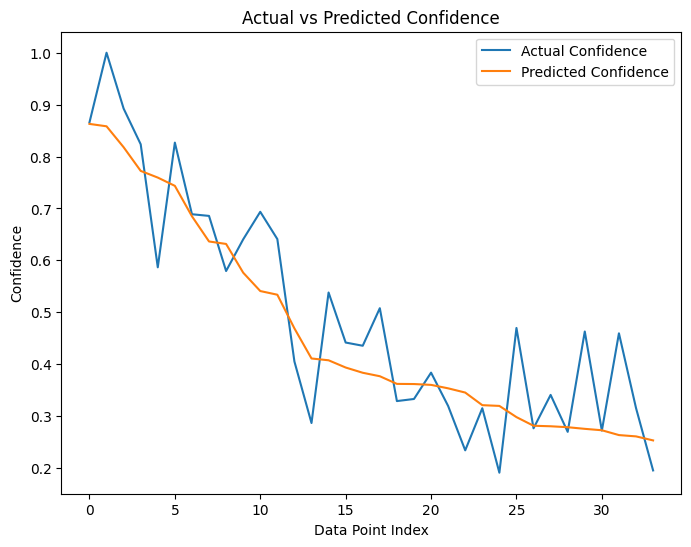

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(actual_confidences, label='Actual Confidence')
plt.plot(predicted_confidences, label='Predicted Confidence')
plt.xlabel("Data Point Index")
plt.ylabel("Confidence")
plt.title("Actual vs Predicted Confidence")
plt.legend()
plt.show()

In [ ]:
print(f'Average predicted confidence: {np.mean(predicted_confidences):.2f}')
print(f'Average actual confidence: {np.mean(actual_confidences):.2f}')

Average predicted confidence: 0.46
Average actual confidence: 0.49
